In [1]:
import numpy as np

# Function to perform PCA
def pca(X, n_components=2):
    # Step 1: Standardize the data (mean = 0, variance = 1)
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_meaned.T)
    
    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort the eigenvalues in descending order and get the corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices for sorting eigenvalues
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    
    # Step 5: Select the top n_components eigenvectors (principal components)
    eigenvectors_selected = eigenvectors_sorted[:, :n_components]
    
    # Step 6: Project the data onto the selected eigenvectors
    X_pca = X_meaned.dot(eigenvectors_selected)
    
    return X_pca, eigenvectors_selected, eigenvalues_sorted

# Example usage
if __name__ == "__main__":
    # Sample data (3 samples, 4 features)
    X = np.array([
        [2.5, 2.4, 3.5, 1.1],
        [0.5, 0.7, 1.2, 0.9],
        [2.2, 2.9, 3.3, 1.5],
        [1.9, 2.2, 2.8, 1.0]
    ])
    
    # Perform PCA
    X_pca, eigenvectors, eigenvalues = pca(X, n_components=2)
    
    print("Principal Components:")
    print(X_pca)
    print("\nEigenvalues:")
    print(eigenvalues)
    print("\nEigenvectors:")
    print(eigenvectors)


Principal Components:
[[-1.0790714  -0.34582773]
 [ 2.39729342  0.02000601]
 [-1.11911711  0.3872344 ]
 [-0.19910491 -0.06141268]]

Eigenvalues:
[ 2.73449223e+00  9.12396860e-02  9.26808406e-03 -2.98952129e-16]

Eigenvectors:
[[-0.52896948 -0.43597521]
 [-0.56014499  0.62797793]
 [-0.62785307 -0.29399421]
 [-0.11058665  0.5737044 ]]


Explained Variance Ratio by Each Component:
Principal Component 1: 0.73
Principal Component 2: 0.23


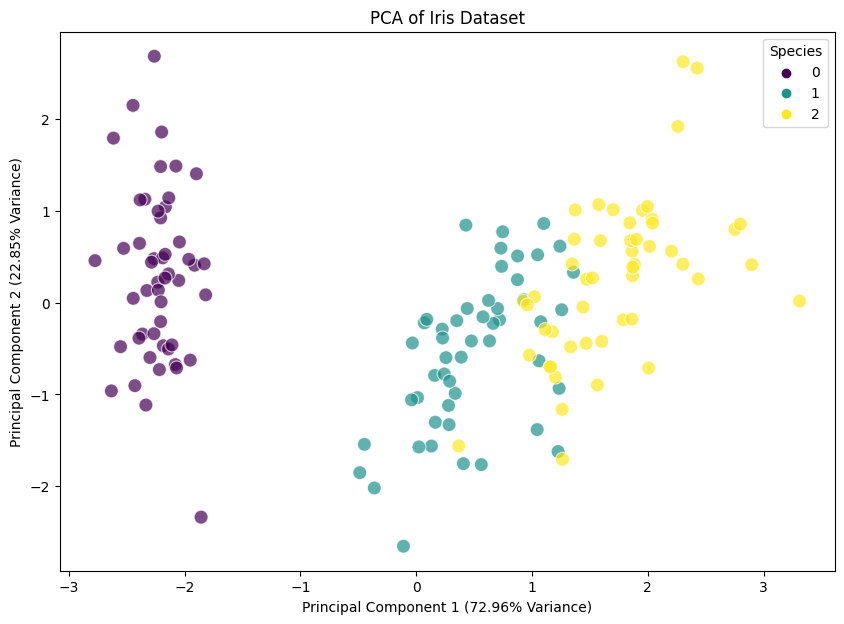


Principal Components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

Reconstructed Data (First 5 Samples):
[[-0.99888895  1.05319838 -1.30270654 -1.24709825]
 [-1.33874781 -0.06192302 -1.22432772 -1.22057235]
 [-1.36096129  0.32111685 -1.38060338 -1.35833824]
 [-1.42359795  0.0677615  -1.34922386 -1.33881298]
 [-1.00113823  1.24091818 -1.37125365 -1.30661752]]


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Example: Iris dataset)
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze PCA Results
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio by Each Component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var:.2f}")

# Step 4: Create a PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Step 5: Visualize PCA Results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Target', 
    palette='viridis', 
    data=pca_df,
    s=100,
    alpha=0.7
)
plt.title('PCA of Iris Dataset')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% Variance)')
plt.legend(title='Species')
plt.show()

# Step 6: Display Principal Components
print("\nPrincipal Components:")
print(pca.components_)

# Step 7: Reconstruct Data (optional)
X_reconstructed = pca.inverse_transform(X_pca)
print("\nReconstructed Data (First 5 Samples):")
print(X_reconstructed[:5])
